# Analyzing Facebook Posts by Year

---
[Download your own data from here](https://web.facebook.com/dyi/?referrer=yfi_settings&_rdc=1&_rdr)
##### Since this code is only for analyzing posts so only select posts option and select the format of data as json

In [45]:
# importing pandas 
import pandas as pd

# loading the dataset from the facebook json file
df = pd.read_json('your_posts_1.json')

# my first five posts on facebook 
df.tail()

,timestamp,data,title,attachments,tags
1534,2011-08-30 15:54:23,[{'post': 'May God send his Love like Sunshine...,Hassan Shahzad updated his status.,NaN,NaN
1535,2011-08-30 11:04:42,NaN,Hassan Shahzad created a post.,NaN,NaN
1536,2011-08-18 14:58:35,[],Hassan Shahzad added a new photo to Awais Nawa...,[{'data': [{'media': {'uri': 'photos_and_video...,NaN
1537,2011-08-16 15:03:35,NaN,NaN,[{'data': [{'media': {'uri': 'photos_and_video...,NaN
1538,2011-08-13 08:11:50,[{'post': 'Srdar in Coffee shop wth wife. Srda...,Hassan Shahzad updated his status.,NaN,NaN


## Column Names

---


#### ***timestamp:*** tells the time when the post was created
#### ***data:*** the actual post that was created, NaN means that the post was created but it had only attachments such as images
#### ***title:*** the activity that was done
#### ***attachments:*** if the post has attachments such as any media i.e images, video etc, NaN means that the post was only text
#### ***tags***: If the post has tags

### Renaming and Dropping Unnecessary Columns

---



In [46]:
# renaming the timestamp column as date, inplace set to True so that the new value of the copy is ignored
df.rename(columns={'timestamp': 'date'}, inplace = True)

# dropping unnecessary columns
df = df.drop(columns=['tags', 'title', 'attachments'])

# setting the time format of the date column
pd.to_datetime(df.date)

df.tail()

,date,data
1534,2011-08-30 15:54:23,[{'post': 'May God send his Love like Sunshine...
1535,2011-08-30 11:04:42,NaN
1536,2011-08-18 14:58:35,[]
1537,2011-08-16 15:03:35,NaN
1538,2011-08-13 08:11:50,[{'post': 'Srdar in Coffee shop wth wife. Srda...


### Posts Count per Month

---




In [28]:
# setting the index to date column
df = df.set_index('date')

# resampling the data by 'MS' (Month Start) meaning that the data will be resampled by months and the count of posts per month will be displayed
posts_counts = df.data.resample('MS').size()
posts_counts
# Here 6 written after 2011-08-01 means that I had posted 6 times in that month

date
2011-08-01     6
2011-09-01     2
2011-10-01     0
2011-11-01     0
2011-12-01     0
              ..
2020-05-01    15
2020-06-01    11
2020-07-01    18
2020-08-01    17
2020-09-01     1
Freq: MS, Name: data, Length: 110, dtype: int64

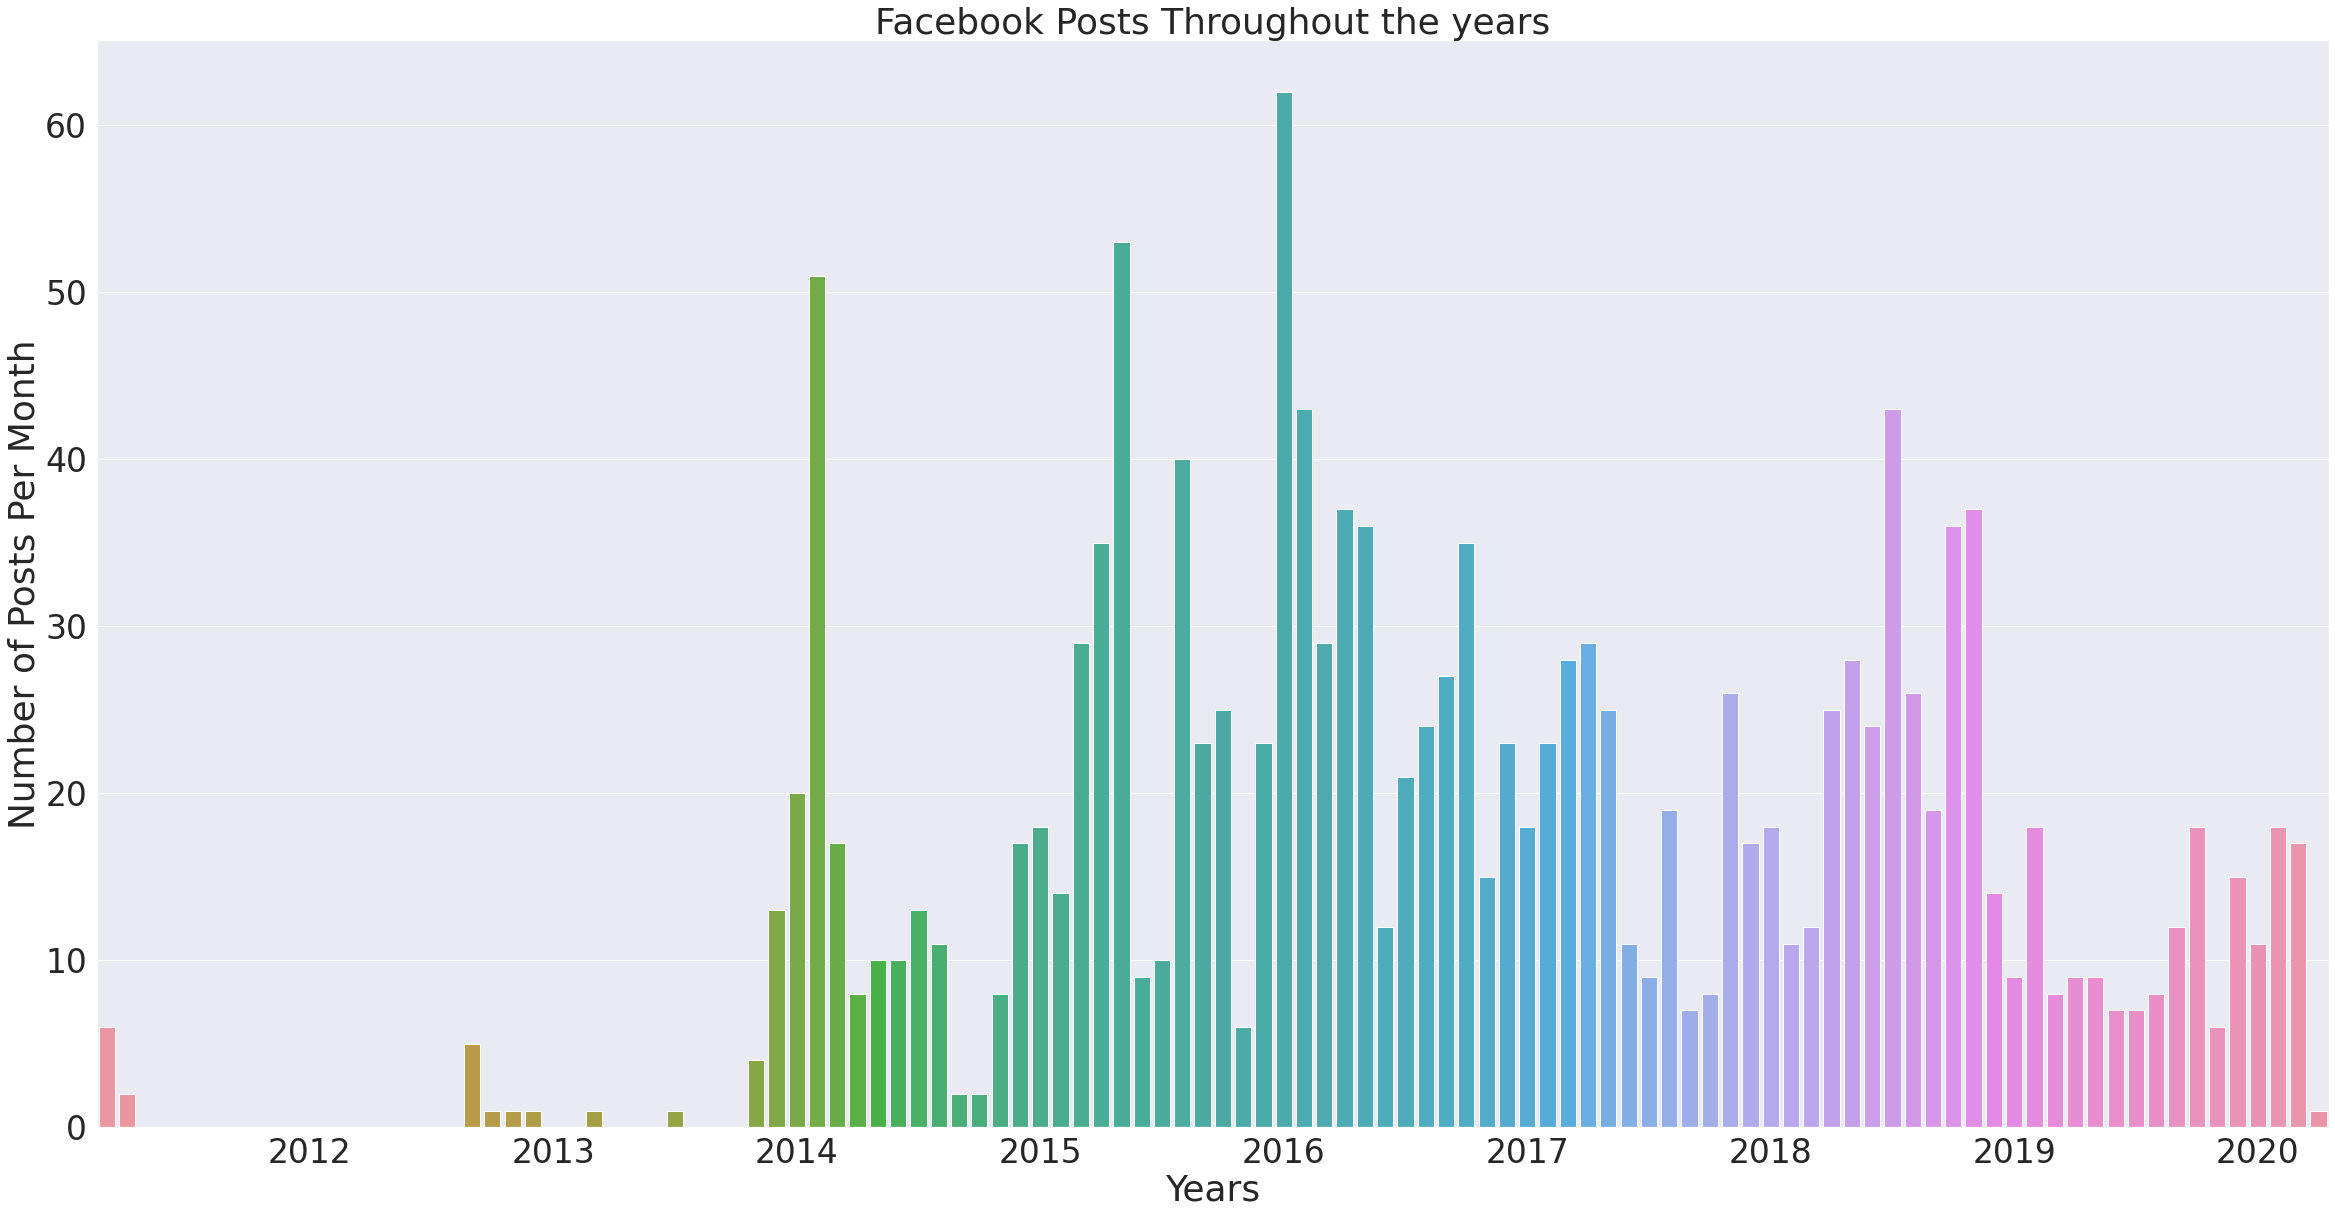

In [48]:
%matplotlib inline

# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)

# set x labels
x_labels = posts_counts.index

# create bar plot
sns.barplot(x_labels, posts_counts)

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(10, len(x_labels), step=12)

#reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))
plt.xlabel('Years')
plt.ylabel('Number of Posts Per Month')
plt.title('Facebook Posts Throughout the years')
# display the plot
plt.show()

Analyzing the above chart we can conclude that I posted the most in year 2016 and 2015. During the first 2 years I used facebook very less.

Source: https://www.dataquest.io/blog/analyze-facebook-data-python/?utm_source=Iterable&utm_medium=email&utm_campaign=newsletter_98